In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0.5,1,'LC_57957_G')

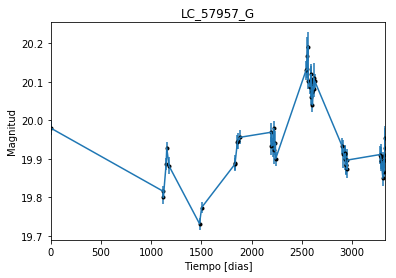

In [4]:
data = np.genfromtxt('LC_57957_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_57957_G')

In [5]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [6]:
%%capture capt
sample = model.run_mcmc(20000)

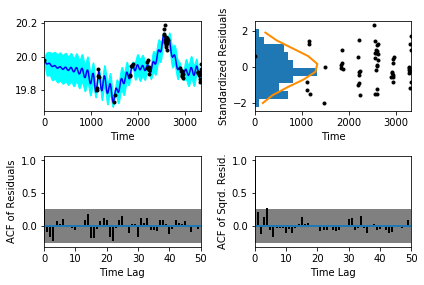

In [7]:
sample.assess_fit()

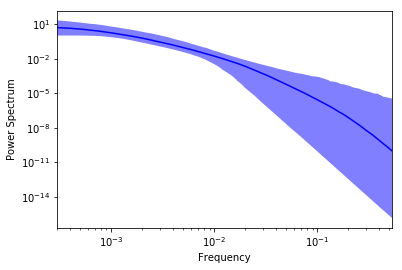

In [8]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [9]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.5,1,'LC_57957_G')

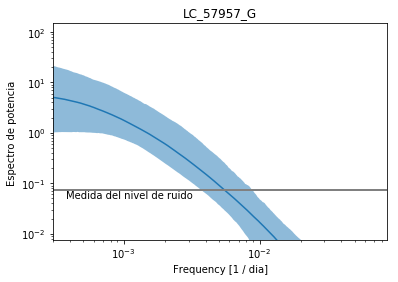

In [10]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_57957_G')

Text(0.5,1,'Prediccion , valor esperado LC_57957_G')

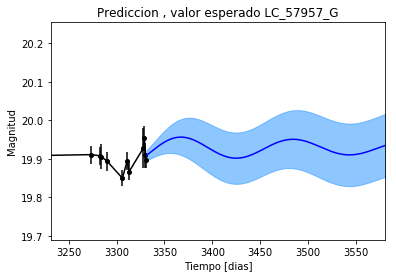

In [11]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_57957_G')

Text(0.5,1,'Prediccion, Caminos simulados  LC_57957_G')

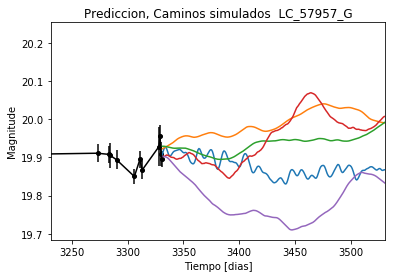

In [12]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitude')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_57957_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'LC_57957_G')

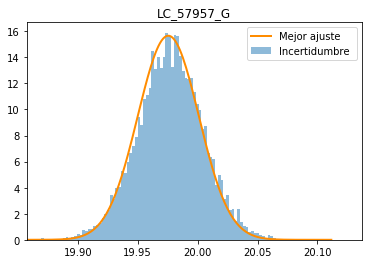

In [13]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_57957_G')

Text(0.5,1,'Interpolacion, camino simulado LC_57957_G')

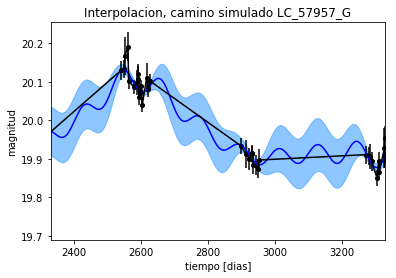

In [14]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_57957_G')

Text(0.5,1,'Interpolacion, camino simulado LC_57957_G')

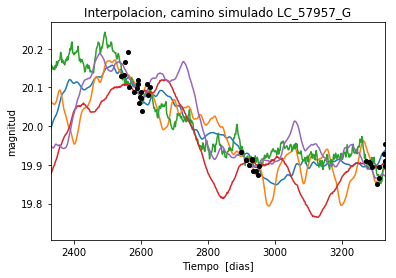

In [15]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_57957_G')

In [16]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [17]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 1879.25135868
Median: 0.0271745229781
Standard deviation: 0.257674477666
68% credibility interval: [ 0.00224426  0.39756955]
95% credibility interval: [  4.34528537e-04   9.05133450e-01]
99% credibility interval: [  3.25719852e-04   1.04160508e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 446.446798133
Median: 0.00558618487394
Standard deviation: 0.0832964741243
68% credibility interval: [ 0.00065899  0.04990637]
95% credibility interval: [ 0.00032794  0.29212938]
99% credibility interval: [  3.05100849e-04   5.36951175e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 488.514624589
Median: 0.0402118201482
Standard 

In [18]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1317.77823633
Median: 134.788222851
Standard deviation: 1.71812530821
68% credibility interval: [ 132.83307672  135.95895785]
95% credibility interval: [ 130.07482471  136.59740045]
99% credibility interval: [ 127.88241245  136.99251429]


In [19]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 484.757884587
Median: 1.28379206948
Standard deviation: 2.52093307061
68% credibility interval: [ 0.14260308  5.11115988]
95% credibility interval: [ 0.03227045  8.48305693]
99% credibility interval: [  0.01578168  10.93542291]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 604.728086598
Median: 1.24306533433
Standard deviation: 10.021747497
68% credibility interval: [  0.07001344  12.81109855]
95% credibility interval: [  4.12497868e-

In [20]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 13544.0462255
Median: 5.93321528073e-45
Standard deviation: 1.33616348339e+90
68% credibility interval: [  3.73562083e-110   6.69300821e-006]
95% credibility interval: [  4.92282093e-272   1.52048019e+028]
99% credibility interval: [  8.30085166e-280   4.15383903e+086]


In [21]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2748.14034916
Median: 19.9206947609
Standard deviation: 0.0535420934825
68% credibility interval: [ 19.87376961  19.96605022]
95% credibility interval: [ 19.81321826  20.03014026]
99% credibility interval: [ 19.7526247  20.0989372]


In [22]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 522.619354767
Median: 0.0117801441046
Standard deviation: 0.265752220346
68% credibility interval: [ 0.          0.42190454]
95% credibility interval: [ 0.          0.94056785]
99% credibility interval: [ 0.          1.03337735]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 522.619354767
Median: 0.0117801441046
Standard deviation: 0.265752220346
68% credibility interval: [ 0.          0.42190454]
95% credibility interval: [ 0.          0.94056785]
99% credibility interval: [ 0.          1.03337735]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1728.40148036
Median: 0.0
Standard deviation: 0.00040530980965
68% cre

In [23]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1317.77823633
Median: 134.788222851
Standard deviation: 1.71812530821
68% credibility interval: [ 132.83307672  135.95895785]
95% credibility interval: [ 130.07482471  136.59740045]
99% credibility interval: [ 127.88241245  136.99251429]


In [24]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2086.00154306
Median: 0.0128313622492
Standard deviation: 0.011219691771
68% credibility interval: [ 0.00801985  0.02185224]
95% credibility interval: [ 0.00544981  0.04186357]
99% credibility interval: [ 0.00438822  0.06772574]


In [25]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1858.14401267
Median: 0.932865182723
Standard deviation: 0.157138531293
68% credibility interval: [ 0.79981206  1.10629648]
95% credibility interval: [ 0.68288425  1.29341617]
99% credibility interval: [ 0.62075392  1.42847196]


In [26]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 556.899957908
Median: 0.000944329863002
Standard deviation: 0.0921274251345
68% credibility interval: [  1.85919552e-05   2.03165391e-02]
95% credibility interval: [  1.47233703e-31   2.30466073e-01]
99% credibility interval: [  4.60408561e-90   5.81701884e-01]


In [27]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 1879.25135868
Median: (-0.170742563505+0j)
Standard deviation: 2.32580045249
68% credibility interval: [-2.49800317+0.j         -0.01410110-5.61431181j]
95% credibility interval: [ -5.68712120e+00+0.j       -2.73022332e-03-6.62014j]
99% credibility interval: [ -6.54459772e+00+0.j          -2.04655819e-03-2.68882916j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 446.446798133
Median: (-0.0350990347231+4.9750829594j)
Standard deviation: 1.74987043825
68% credibility interval: [-0.31357099+0.86768257j -0.00414055+0.03017587j]
95% credibility interval: [-1.83550302+0.06745471j -0.00206049+0.j        ]
99% credibility interval: [ -3.37376374e+00+3.95230514j  -1.91700517e-03+0.j        ]
Posterior summary for parameter ar